In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import requests

In [ ]:
def tolist(text):
    long = list()
    text = text.split('\n')
    for row in text:
        if (row.find('[0]')<0):
            continue
        lat = row.split(', ')
        lat_digits = list()
        lat = lat[1:]
        for i in lat:
            lat.append(float(i))
        long.append(lat)
    return long


lvl = 0 #50.0
#dataset_url = f'http://144.206.233.183/thredds/dodsC/Data/s362d.nc.ascii?data[{lvl}:1:{lvl}][{long0}:1:{long1}][{lat0}:1:{lat1}]'
dataset_url = 'http://144.206.233.183/thredds/dodsC/Data/s362d.nc.ascii?data[%d:1:%d][0:1:360][0:1:180]'%(lvl, lvl)
r = requests.get(dataset_url)
# print(type(r))
text = r.content.decode()
# print(text)
# print(tolist(text, lvl))
data = np.asarray(tolist(text), dtype='float')
print(data)
# print(len(data))
#data = data.transpose()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


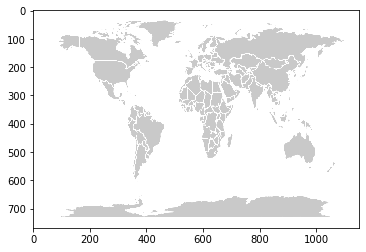

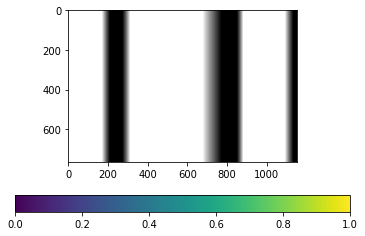

In [9]:
w_map_standart = imread('map.png')
plt.figure()
plt.imshow(w_map_standart)
w_map = data
w_map = resize(w_map, w_map_standart.shape)
plt.figure()
plt.imshow(w_map_standart)
plt.imshow(w_map)
plt.colorbar(norm=Normalize(vmin=data.min(), vmax=data.max()), orientation='horizontal', alpha=0.7)

In [14]:
import requests
import re
import numpy as np


def __parse(content):
    dataset = content.split('\n')
    parsed_dataset = []

    for data_piece in dataset:
        res = re.findall(r'^\[\d+\]\[\d+\]', data_piece)

        if len(res) > 0:
            parsed_dataset.append(data_piece.split(', ')[1:])

    return parsed_dataset


def get(lat, lon, level):
    lons = [i for i in range(361)]
    lats = [90 - i for i in range(181)]
    levels = [
        50.0, 137.5, 212.5, 287.5, 362.5, 462.5, 587.5, 700.0, 800.0, 925.0,
        1075.0, 1225.0, 1375.0, 1525.0, 1675.0, 1825.0, 1975.0, 2125.0,
        2275.0, 2425.0, 2575.0, 2770.0
    ]

    lat_0 = lats.index(lat[0])
    lat_1 = lats.index(lat[1])

    lon_0 = lons.index(lon[0])
    lon_1 = lons.index(lon[1])

    level = levels.index(level)

    # import pdb; pdb.set_trace()
    dataset_url = f'http://144.206.233.183/thredds/dodsC/Data/s362d.nc.ascii?\
                    data[{level}:1:{level}][{lon_0}:1:{lon_1}][{lat_1}:1:{lat_0}]'

    r = requests.get(dataset_url)
    r.raise_for_status()
    parsed_dataset = __parse(r.content.decode())
    parsed_dataset = np.array(parsed_dataset).astype(float)
    parsed_dataset = np.transpose(parsed_dataset)

    return parsed_dataset

In [12]:
import re
 
text = "The ants go marching one by one"
 
strings = ['the', 'one']
 
for string in strings:
    regex = re.compile(string)
    match = re.findall(regex, text)
    if match:
        print('Found "{}" in "{}"'.format(string, text))
        #text_pos = match.span()
        print(text[match.start():match.end()])
    else:
        print('Did not find "{}"'.format(string))

Did not find "the"
Found "one" in "The ants go marching one by one"


AttributeError: 'list' object has no attribute 'start'